Team members: 
* Fatou SALL
* Sebastion COUBE


La structure du graphique contient-elle des informations sur le contenu des nœuds? Nous aimerions savoir s'il est possible de détecter des communautés de pages simplement en regardant les liens hypertexte et de faire correspondre ces communautés avec des données du monde réel telles que les catégories de pages. Le regroupement spectral est-il une possibilité viable par rapport à une méthode éprouvée de détection communautaire?


In [156]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Introduction

In [139]:
import pandas as pd
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import lil_matrix
import seaborn as sns
import networkx as nx
import operator
import community
import plotly
import plotly.graph_objs as go
import plotly.plotly as py

from networkx.drawing.nx_agraph import graphviz_layout
from scipy import linalg, cluster, sparse
from tqdm import tqdm_notebook
from utils import get_bag_of_communities

from utils import load_obj, save_obj

## Algorithme

### Etape 1  : Calcul du laplacien

In [100]:
def diag_matrice_degre(w):
    print("0-Calcul de la matrice dégré d .....................\n ")
    
    return np.diag(np.sum(w,axis=1))


def laplacien(w):
    print("1-Calcul du laplacien .....................\n ")
    return diag_matrice_degre(w)-w   

### Etape 2 : Calcul des k vecteurs associés aux k plus petites valeurs propres du laplacien

In [101]:
def k_vector_propre(L,k): 
    print("2-Calcul des {} vecteurs associés aux {} plus petites valeurs propres du laplacien .....................\n ".format(k,k))
    eigenvalues, eigenvectors = np.linalg.eig(L)
    sorted_index = np.argsort(eigenvalues)
    eigenvectors=np.array(eigenvectors)
    plt.plot(eigenvalues, '.-', markersize=15)
    plt.imshow
    return eigenvectors[:,sorted_index[0:k]]
    


### Etape 3  : Partitionnement des vecteurs propres en avec kmeans

In [123]:
def spectralClustering(w,k):
    print("3-Partitionnement des vecteurs propres en avec kmeans .....................\n ")
    L=laplacien(w)
    Y=k_vector_propre(L,k) 
    return Kmeans(Y,2)
def initialize(X,K):
    print('Initialisation .....................\n ')
    centers = X[random.sample(range(0,(X.shape[0]-1)),K)]
    return centers

def assignment(X, centers):
    indx = []
    for point in X:
        norm = np.linalg.norm((centers-point), axis =1)
        indx.append(np.argmin(norm))
    return indx

def updateCenters(X,K,indx):

    newCenters = []
    for clusterNumber in range(0,K):
        Cluster = X[[i for i, find in enumerate(indx) if find == clusterNumber]]
        centroid = Cluster.mean(axis=0)
        newCenters.append(centroid)
    return newCenters

def AvgScore(X,K,indx,centers):
    score = []
    for clusterNumber in range(0,K):
        Cluster = X[[i for i, find in enumerate(indx) if find == clusterNumber]]
        distanceList = np.linalg.norm((Cluster-centers[clusterNumber]), axis =1)
        score.append(np.mean(distanceList))
            
    return score



def Kmeans(X,K,tol=0.0001,plot=False,stat=False):
    X = np.array(X)
    centers = initialize(X,K)
    indx = assignment(X, centers)
    AvgScore(X,K,indx,centers)
    Distortion = 1
    print('Mis à jours des clusters .....................\n ')
    while Distortion > tol:
        newCenters = updateCenters(X,K,indx)
        newIndx = assignment(X, newCenters)
        
        scoreOld = AvgScore(X,K,indx,centers)
        scoreNew = AvgScore(X,K,newIndx,newCenters)
        
        Distortion = np.linalg.norm((np.array(scoreOld) - np.array(scoreNew)), axis =0)
        centers = newCenters
        indx = newIndx
        if stat:
            print('Score Old:',scoreOld,'\n')
            print('Score new:',scoreNew,'\n')
            print('Distortion:', Distortion)
            print('---------------------')
        
    if plot:
        DisplayPlot(X,K,centers,indx)
        
    return centers, indx, scoreNew

In [92]:
def DisplayPlot(X,K,centers,indx):
    colors = ['green', 'purple', 'yellow', 'red', 'orange', 'plum', 'navy', 'seagreen', 'pink', 'brown']
    for clusterNumber in range(0,K):
        Cluster = X[[i for i, find in enumerate(indx) if find == clusterNumber]]
        plt.scatter(Cluster[:,0],Cluster[:,1], marker='.' ,color=colors[clusterNumber])
        plt.scatter(np.array(centers)[clusterNumber,0],np.array(centers)[clusterNumber,1], marker='+' ,color='black')    
    plt.show()

## Application:

### Données simulées

In [108]:

from sklearn import cluster, datasets
noisy_moons = datasets.make_moons(n_samples=1000, noise=.05)
df = pd.DataFrame(noisy_moons[0]) ## convert to DF



#### Génération d'une matrice poids adjacente

In [109]:
def matrice_adjacente(X,gamma):
    n=X.shape[0]
    a=np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            a[i,j] = math.exp(-math.pow(np.linalg.norm((X[i]-X[j]),2),2) * gamma)
    return a
def construct_W(X, Wtemp, k_neighbors):
    scores_matrix = lil_matrix(Wtemp)
    # knn_matrix is a sparse matrix
    knn_matrix = kneighbors_graph(X, k_neighbors, mode='connectivity', include_self=True)
    W = knn_matrix.multiply(scores_matrix)  # pointwise multiply
    return W.toarray()

#### Visualisation des données

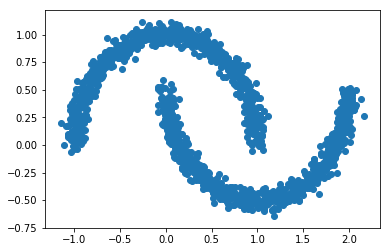

In [59]:


import matplotlib.pyplot as plt
plt.scatter(df[0],df[1])
plt.show()

 #### Détection de communauté:

Partitionnement des vecteurs propres en avec kmeans 
 
Calcul du laplacien 
 
Matrice d 
 
Calcul des 2 vecteurs associés aux k plus petites valeurs propres du laplacien  
 


C:\Anacond\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning:

Casting complex values to real discards the imaginary part



Initialisation .....................
 
Mis à jours des clusters .....................
 


C:\Anacond\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning:

Casting complex values to real discards the imaginary part



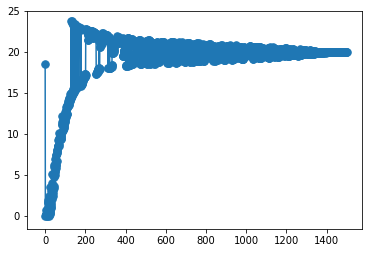

In [118]:
X = np.array(df)
A = adj_generate(X,1)
w = construct_W(X,A,20)
centers, indx, score = spectralClustering(w,2)


#### Visualition des communautés trouvées

C:\Anacond\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning:

Casting complex values to real discards the imaginary part



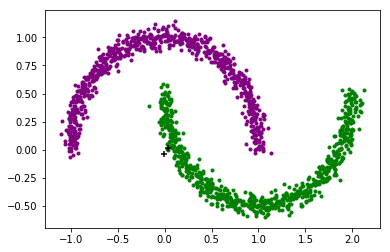

In [119]:
DisplayPlot(np.array(df),2,centers,indx)

### Application sur les données de Wikipedia

#### Parsing des données

In [6]:
from utils import explore_page

In [19]:
root_node = 'Jaguar (disambiguation)'

network = {}  # This dict stores for each page a dictionnary containing the keys [url, links, categories]
first_nodes = []

explore_page(root_node, network, first_nodes)

second_nodes = []
for node in first_nodes:
    explore_page(node, network, second_nodes)

C:\Anacond\lib\site-packages\bs4\__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anacond\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")




Disambiguation of : Jaguar (disambiguation)
Disambiguation of : Banzai!
Disambiguation of : Jaguares (disambiguation)
Disambiguation of : JAGS (disambiguation)
Disambiguation of : JAG (disambiguation)


In [24]:
all_nodes = list(network.keys()) + second_nodes
for link in tqdm_notebook(second_nodes):
    explore_page(link, network, [], inner=True, all_nodes=all_nodes)

In [ ]:
all_nodes = list(network.keys())
for title in tqdm_notebook(network.keys()):
    network[title]['links'] = list(set(network[title]['links']).intersection(set(all_nodes)))

In [ ]:


l = list(network.keys())
for i in l:
    if len(network[i]['links']) == 0:
        del network[i]



In [ ]:
for i, title in enumerate(network.keys()):
    cats = network[title]['categories']
    new_cats = []
    for c in cats:
        if not c.startswith('Redundant') and not c.startswith('Pages') and not c.startswith('Webarchive') and not c.startswith('Wikipedia') and not c.startswith('Articles') and not c.startswith('Coordinates on Wikidata') and not 'Wikidata' in c and not c.startswith('CS1') and not c.startswith('EngvarB') and not c.startswith('All') and not c.startswith('Good articles') and not c.startswith('Use dmy'):
            new_cats.append(c)
    network[title]['categories'] = new_cats

#### Création des graphes

In [7]:
# save_obj(network, 'network')
network = load_obj('network')

In [8]:
neighbors = {}
for i in network.keys():
    neighbors[i] = network[i]['links']

In [9]:
g = nx.Graph(neighbors)  # undirected graph

In [28]:
print('Total number of nodes : {}'.format(len(g.nodes)))
print('Total number of edges : {}'.format(len(g.edges)))
if nx.is_connected(g):
    print('The graph is connected.')
else:
    print('The graph is not connected.')

Total number of nodes : 6830
Total number of edges : 367483
The graph is connected.


In [25]:
w = nx.adjacency_matrix(g)
w.shape

(6830, 6830)

In [ ]:
def matrice_adjacente(X):
    return nx.adjacency_matrix(X)

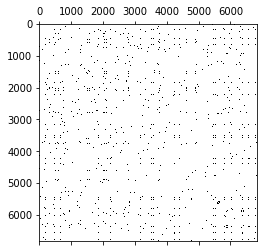

In [30]:

plt.spy(adj.todense())


In [31]:


(adj != adj.T).count_nonzero() == 0



True

In [ ]:
#nx.draw(g, node_size=5, figsize=(15, 15))

#### Détection des communautés

Partitionnement des vecteurs propres en avec kmeans 
 
Calcul du laplacien 
 
Matrice d 
 
Calcul des 2 vecteurs associés aux k plus petites valeurs propres du laplacien  
 


C:\Anacond\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning:

Casting complex values to real discards the imaginary part



Initialisation .....................
 
Mis à jours des clusters .....................
 


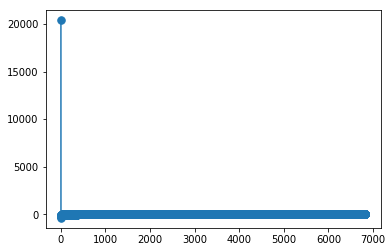

In [126]:
k=2
w = nx.adjacency_matrix(g)
centroid , labels, score = spectralClustering(w,k)


In [128]:
spectral_partition = {}
for i, title in enumerate(network.keys()):
    spectral_partition[title] = labels[i]

In [132]:
spectral_bag = get_bag_of_communities(network, spectral_partition)

In [134]:

spectral_counts = [0 for _ in range(k)]
for i, title in enumerate(spectral_partition.keys()):
    spectral_counts[spectral_partition[title]] += 1



In [137]:
for i in range(k):
    sorted_bag = sorted(spectral_bag[i].items(), key=operator.itemgetter(1), reverse=True)
    print(' ')
    print('Community {}/{} ({} pages) : '.format(i+1, k, spectral_counts[i]))
    if spectral_counts[i] > 0:
        for ind in range(10):
            print(sorted_bag[ind])

 
Community 1/2 (392 pages) : 
('IUCN Red List least concern species', 165)
('Carnivora stubs', 56)
('IUCN Red List vulnerable species', 41)
('Mammal genera', 36)
('Mammals of the United States', 36)
('Carnivorans of Africa', 35)
('Mammals of Asia', 34)
('Carnivorans of Malaysia', 34)
('Mammals described in 1758', 33)
('Carnivorans of South America', 32)
 
Community 2/2 (6438 pages) : 
('Formula One constructors', 139)
('Formula One entrants', 129)
('Ship infoboxes without an image', 118)
('Jacksonville Jaguars players', 116)
('Best Original Song Academy Award-winning songwriters', 114)
('Character pop', 110)
('Single-engined tractor aircraft', 102)
('Grammy Award winners', 95)
('Carrier-based aircraft', 92)
('Jacksonville Jaguars currentteam parameter articles', 86)


#### Validation croisée pour le k optimal

In [ ]:
cross_val = {}
for k in tqdm_notebook(range(10, 30)):
    tmp = []
    for _ in range(5):
        centroid , labels, score = spectralClustering(w,2)
        spectral_partition = {}
        for i, title in enumerate(network.keys()):
            spectral_partition[title] = labels[i]
        spectral_modularity = community.modularity(spectral_partition, g)
        tmp.append(spectral_modularity)
    cross_val[k] = [np.mean(tmp), np.std(tmp)]
    
save_obj(d, 'cross_val')

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

Partitionnement des vecteurs propres en avec kmeans 
 
Calcul du laplacien 
 
Matrice d 
 
Calcul des 2 vecteurs associés aux k plus petites valeurs propres du laplacien  
 


In [ ]:


cross_val = load_obj('cross_val')
cross_val



#### Visualition des communautés

In [141]:
community2color = {
    0: sns.xkcd_rgb["peach"],
    1: sns.xkcd_rgb["powder blue"],
    2: sns.xkcd_rgb["light pink"],
    3: sns.xkcd_rgb["chocolate"],
    4: sns.xkcd_rgb["orange"],
    5: sns.xkcd_rgb["magenta"],
    6: sns.xkcd_rgb["purple"],
    7: sns.xkcd_rgb["blue"],
    8: sns.xkcd_rgb["deep blue"],
    9: sns.xkcd_rgb["sky blue"],
    10: sns.xkcd_rgb["olive"],
    11: sns.xkcd_rgb["seafoam green"],
    12: sns.xkcd_rgb["tan"],
    13: sns.xkcd_rgb["mauve"],
    14: sns.xkcd_rgb["hot pink"],
    15: sns.xkcd_rgb["pale green"],
    16: sns.xkcd_rgb["indigo"],
    17: sns.xkcd_rgb["lavender"],
    18: sns.xkcd_rgb["eggplant"],
    19: sns.xkcd_rgb["brick"],
    20: sns.xkcd_rgb["light blue"],
}

In [150]:
position = nx.spring_layout(g)

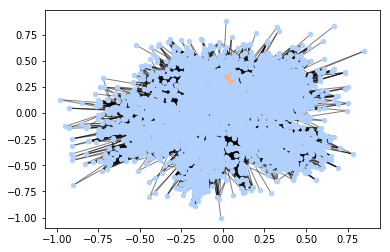

In [144]:


for community in set(spectral_partition.values()) :
    list_nodes = [nodes for nodes in spectral_partition.keys() if spectral_partition[nodes] == community]
    nx.draw_networkx_nodes(g, position, list_nodes, node_size=20, node_color=community2color[int(community)])

nx.draw_networkx_edges(g, position, alpha=0.5)
plt.show()



In [145]:
for i in spectral_partition.keys():
    spectral_partition[i] = str(spectral_partition[i])

In [146]:
nx.set_node_attributes(g, spectral_partition, 'spectral')

In [153]:
nx.write_graphml(g, 'data/full_graph.graphml')